In [1]:
import numpy as np        # for numeric data calculations
import pandas as pd       # for data read

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar



In [6]:
uber=pd.read_csv("https://raw.githubusercontent.com/KislayKaran/sql_-_python_concepts-handson/main/Python_DataAnalytics_HandsOn/Dedicated_CSV_files/6_Uber%20Drives.csv")
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Checking for the Missing Values .....NaN

In [7]:
uber.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
pd.isnull(uber).sum()   # No of the Missing Values

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [9]:
data=uber.dropna()

In [10]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

# Converting 'Object' dtypes for dates into datetime format

In [12]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format= '%m/%d/%Y %H:%M')

C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_8420/1937261688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format= '%m/%d/%Y %H:%M')


In [13]:
data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format= '%m/%d/%Y %H:%M')

C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_8420/3889995581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format= '%m/%d/%Y %H:%M')


In [14]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
#Creating the Empty Lists

hour=[]
day=[]
day_of_week=[]
month=[]
weekday=[]


for x in data['START_DATE*']:
    hour.append(x.hour)            # from the 'START_DATE*'' extracting H-hour and then adding it to the hour() empty list 
    day.append(x.day)
    day_of_week.append(x.day_of_week)
    month.append(x.month)
    weekday.append(calendar.day_name[day_of_week[-1]])
    
data['HOUR']=hour    # Adding the extracted List values to the respective Column Values in the Datasets
data['DAY']=day
data['DAY OF WEEk']=day_of_week
data['MONTH']=month
data['WEEKDAY']=weekday


C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_8420/4156703945.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR']=hour    # Adding the extracted List values to the respective Column Values in the Datasets
C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_8420/4156703945.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY']=day
C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_8420/4156703945.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [16]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEk,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [17]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

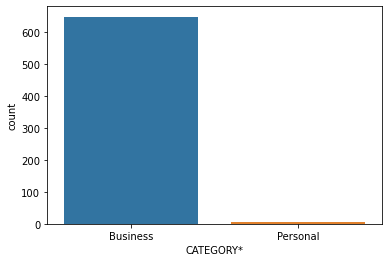

In [18]:
sns.countplot(x='CATEGORY*', data=data)

# How Long do People travel with UBER

<AxesSubplot:ylabel='Frequency'>

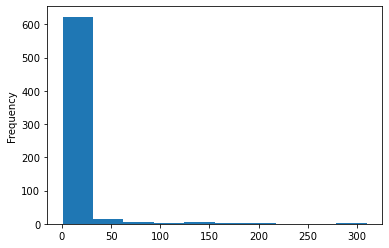

In [19]:
data['MILES*'].plot.hist()

# What HOUR do most People Take Uber to their Destination?

Text(0.5, 1.0, 'Number of Trips Vs Hours')

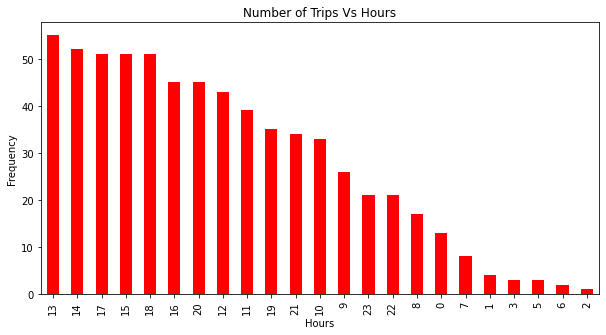

In [20]:
hours=data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='red', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')


# Checking the purpose of the Trips

<AxesSubplot:>

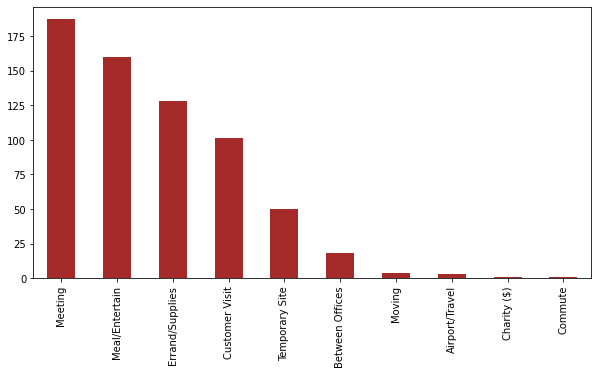

In [21]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

# Which Day in the week has the highest No. of Trips

<AxesSubplot:>

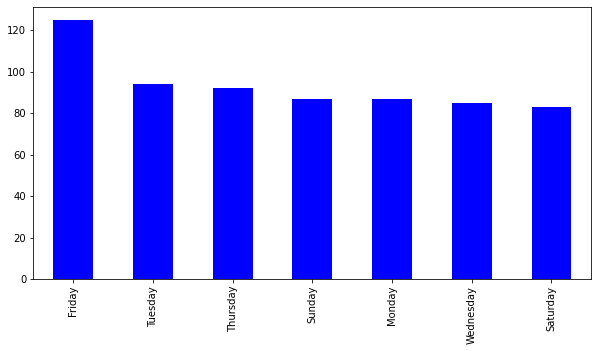

In [22]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

# No. of Trips per each Day

<AxesSubplot:>

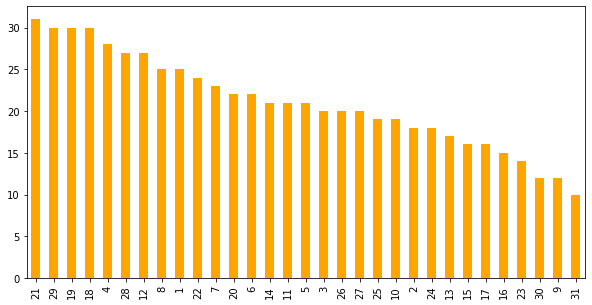

In [23]:
data['DAY'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

# What are the Trips in the Month

<AxesSubplot:>

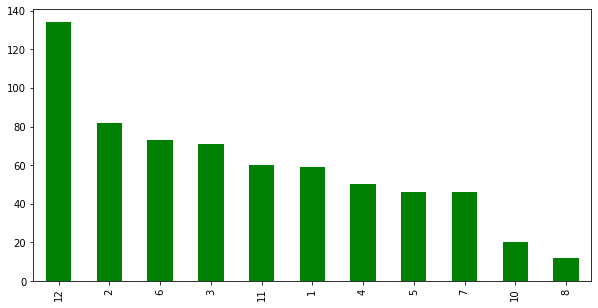

In [24]:
data['MONTH'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

# Where Do People Board mostof the time

<AxesSubplot:>

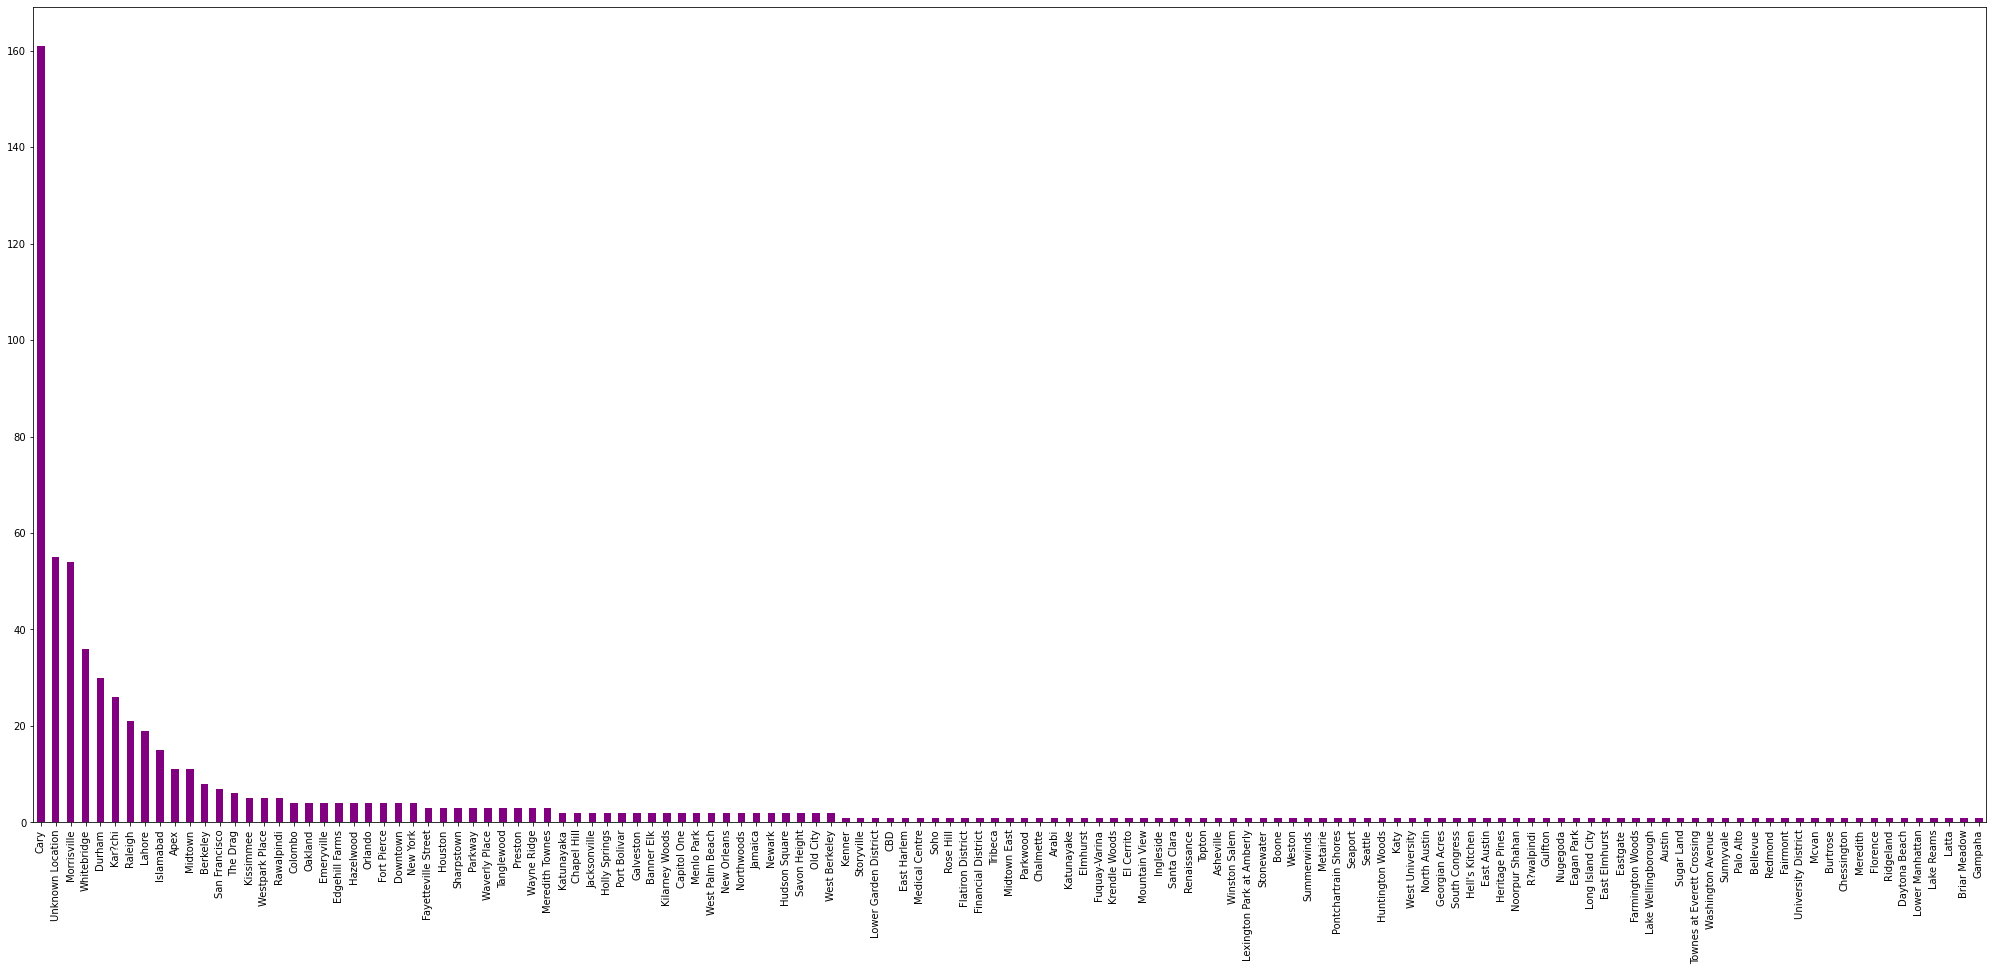

In [25]:
data['START*'].value_counts().plot(kind='bar', figsize=(35,15), color='purple')